Basic Fourier Transform Demonstration


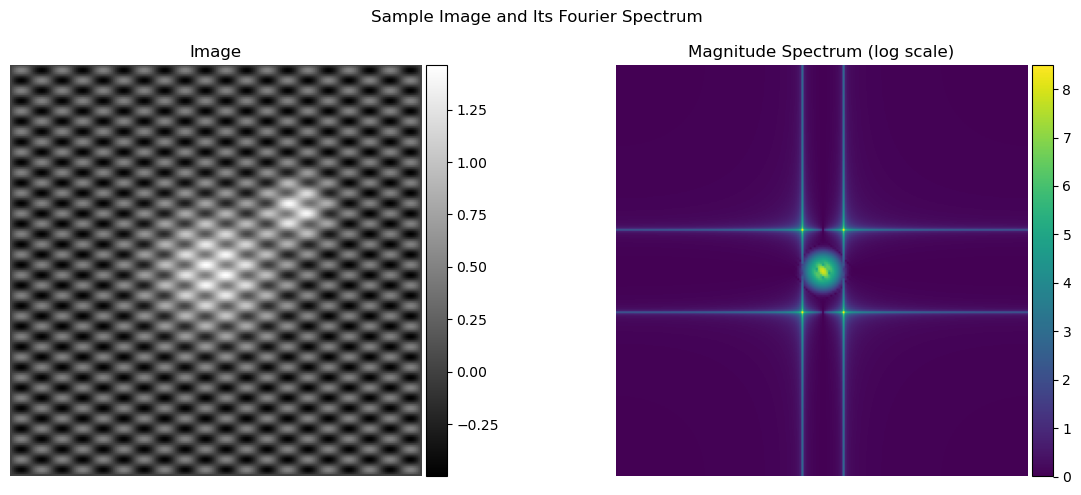


Linearity Property Demonstration
Maximum difference between FT(a*f + b*g) and a*FT(f) + b*FT(g): 4.626901699706454e-13
Linearity property holds: True


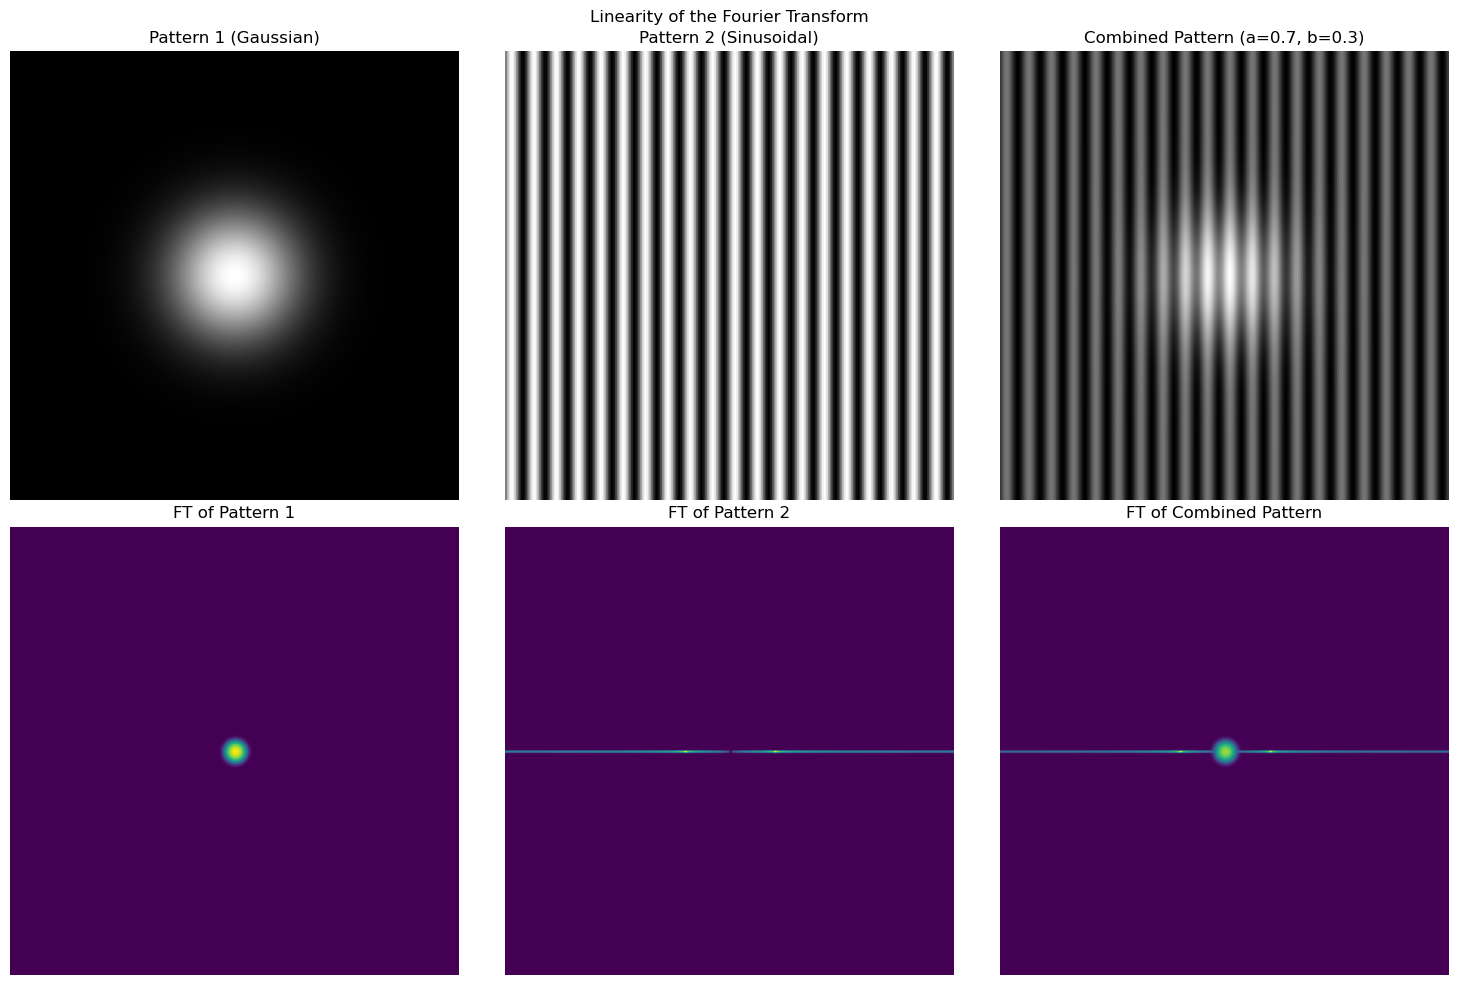


Shift Theorem Demonstration


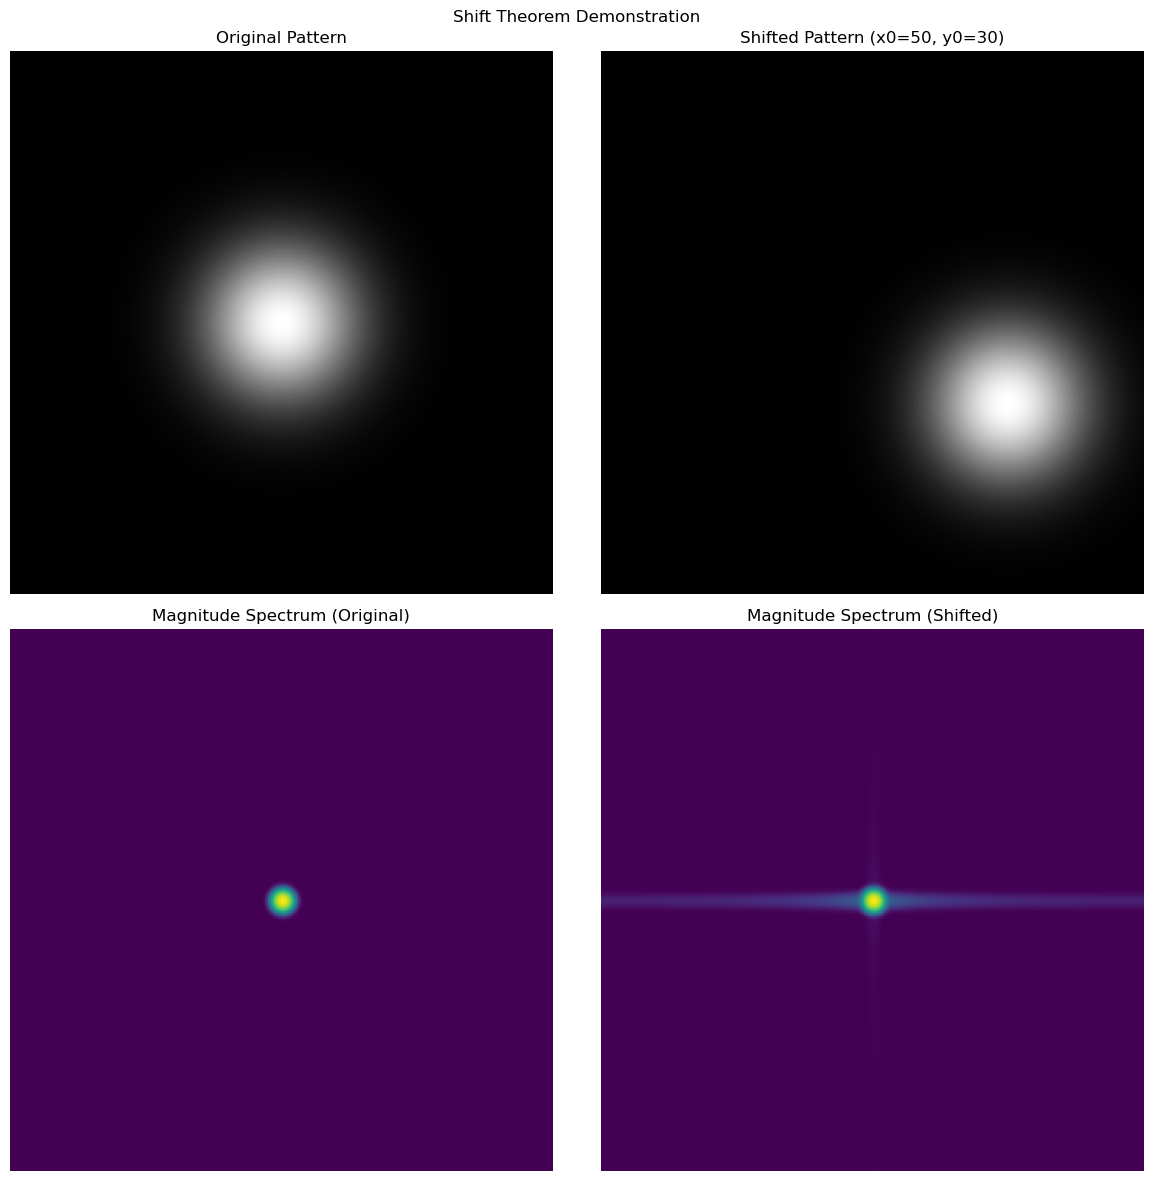

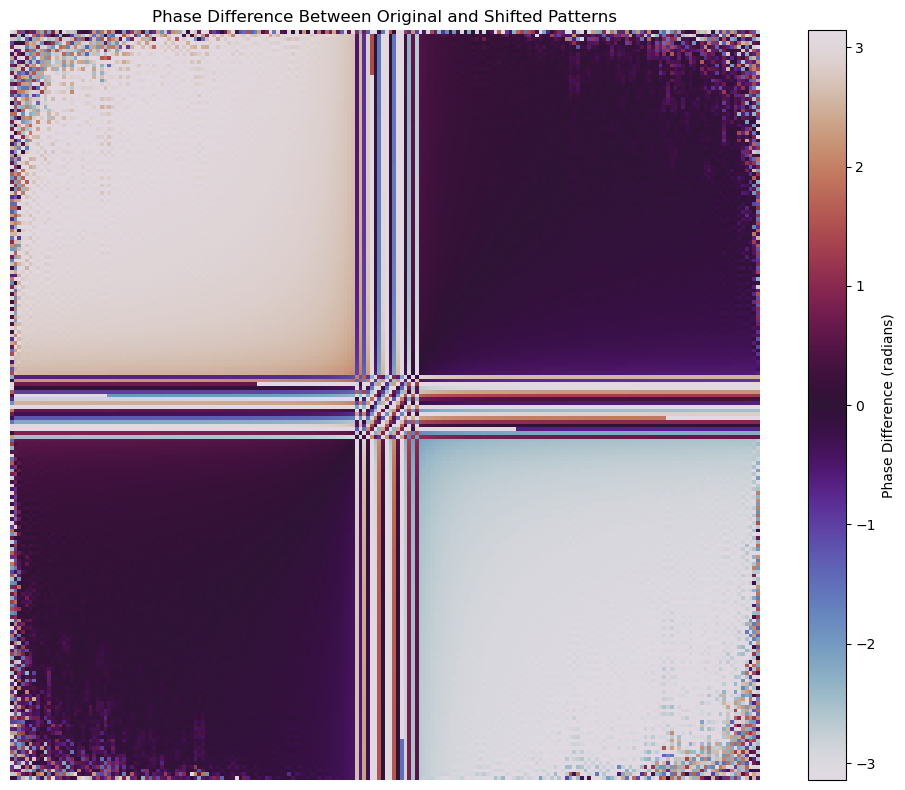


Parseval's Theorem Demonstration
Energy in spatial domain: 4111.887829208515
Energy in frequency domain: 4111.8878292085155
Ratio (should be close to 1.0): 1.0000000000000002

Spatial Frequency Demonstration


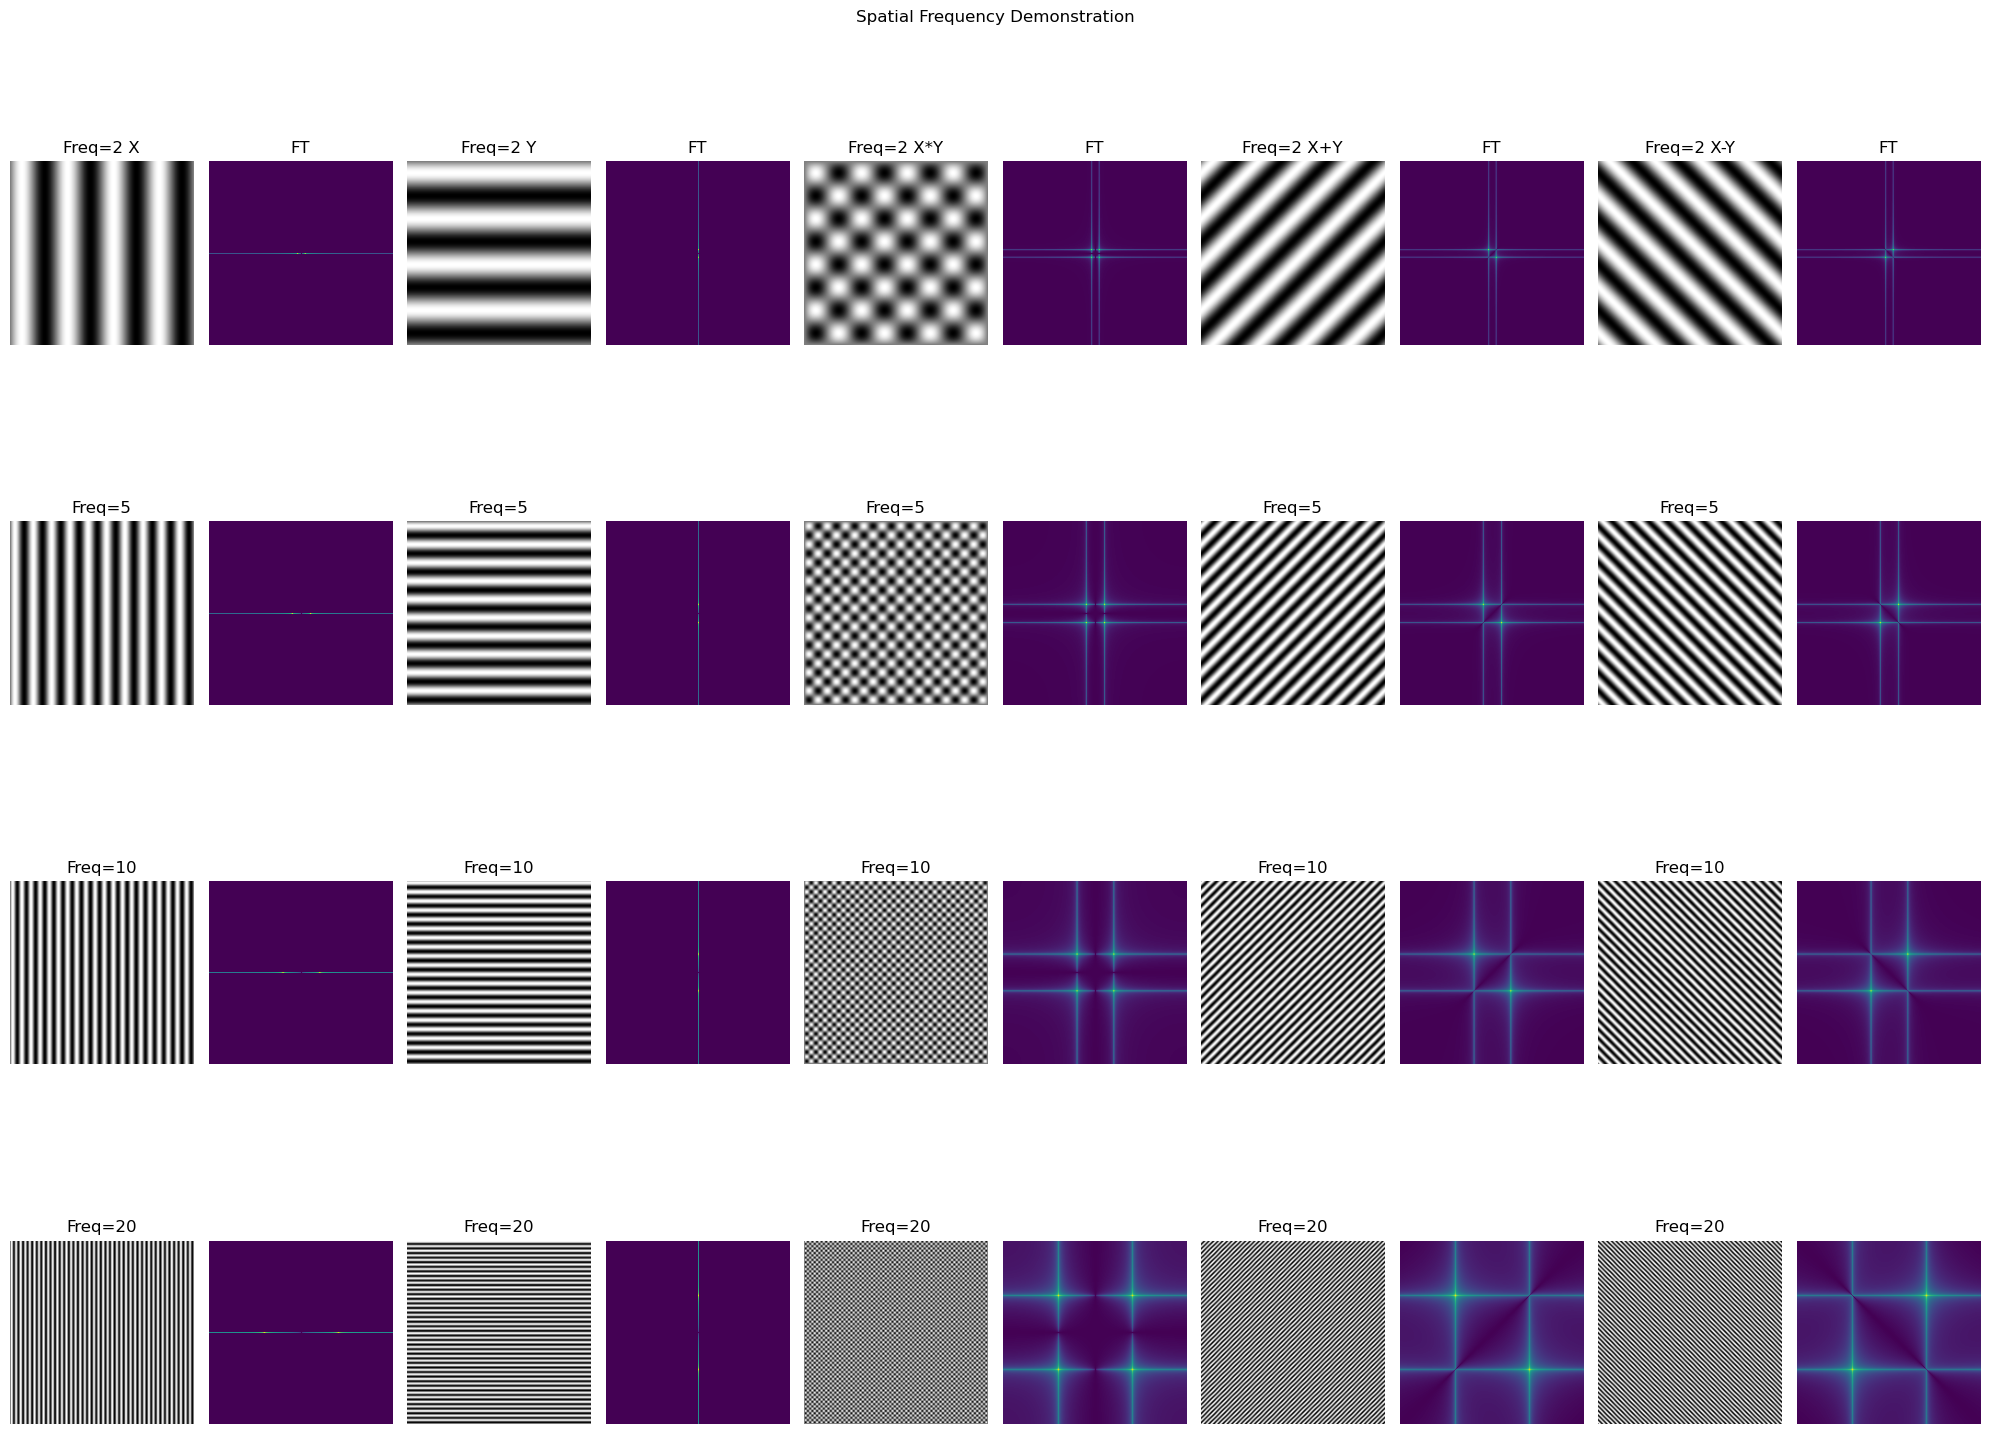


Nyquist-Shannon Sampling Theorem Demonstration


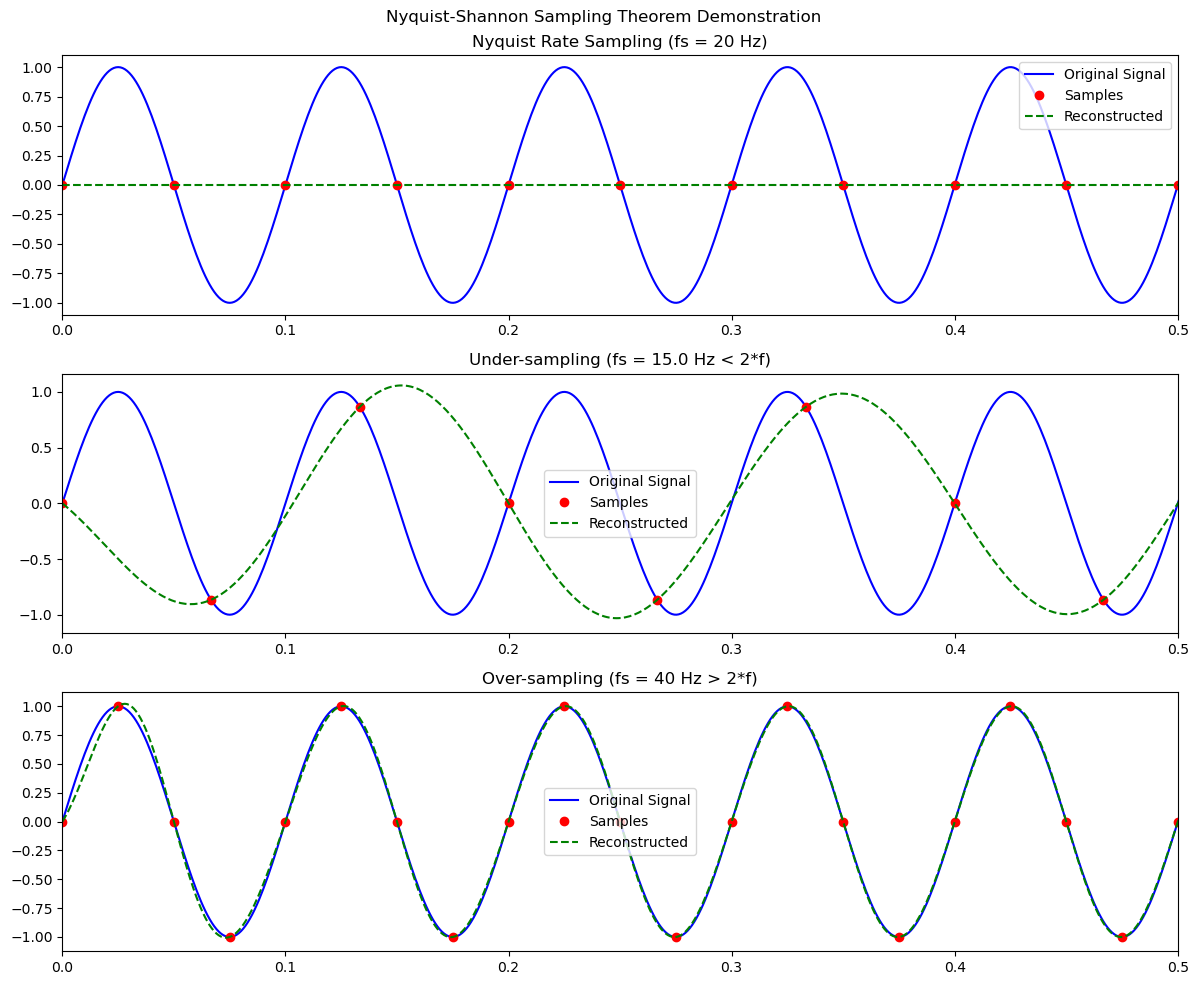

In [2]:
"""
fourier_basics.py - Fundamental concepts in Fourier Optics

This module demonstrates the basic mathematical foundations of Fourier Optics,
including Fourier transforms, spatial frequency domain representations,
and basic image processing in the frequency domain.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.fftpack as fft

def plot_image_and_spectrum(image, title="Image and Its Fourier Spectrum", figsize=(12, 5)):
    """
    Plot an image and its Fourier spectrum side by side.
    
    Parameters:
    -----------
    image : 2D numpy array
        The input image
    title : str
        The title for the figure
    figsize : tuple
        Figure size
    """
    # Compute the 2D FFT
    f_image = fft.fft2(image)
    f_image_shifted = fft.fftshift(f_image)  # Shift zero frequency to center
    
    # Compute the magnitude spectrum (log scale for better visualization)
    magnitude_spectrum = np.abs(f_image_shifted)
    
    # Create the figure
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(title)
    
    # Plot the original image
    im1 = axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Image')
    axs[0].set_axis_off()
    
    # Add colorbar to the first image
    divider = make_axes_locatable(axs[0])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)
    
    # Plot the magnitude spectrum (log scale)
    im2 = axs[1].imshow(np.log1p(magnitude_spectrum), cmap='viridis')
    axs[1].set_title('Magnitude Spectrum (log scale)')
    axs[1].set_axis_off()
    
    # Add colorbar to the spectrum
    divider = make_axes_locatable(axs[1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)
    
    plt.tight_layout()
    plt.show()
    
    return f_image_shifted, magnitude_spectrum

def demonstrate_linearity():
    """
    Demonstrate the linearity property of the Fourier transform.
    
    The Fourier transform is a linear operation, meaning:
    F{a*f(x) + b*g(x)} = a*F{f(x)} + b*F{g(x)}
    """
    # Create sample images (patterns)
    x = np.linspace(-100, 100, 200)
    y = np.linspace(-100, 100, 200)
    X, Y = np.meshgrid(x, y)
    
    # Pattern 1: Gaussian
    sigma1 = 20
    pattern1 = np.exp(-(X**2 + Y**2) / (2 * sigma1**2))
    
    # Pattern 2: Sinusoidal grating
    freq = 0.1
    pattern2 = np.sin(2 * np.pi * freq * X)
    
    # Linear combination
    a, b = 0.7, 0.3
    combined_pattern = a * pattern1 + b * pattern2
    
    # Compute the Fourier transforms
    ft1 = fft.fft2(pattern1)
    ft2 = fft.fft2(pattern2)
    ft_combined = fft.fft2(combined_pattern)
    
    # Compute the linear combination of the transforms
    ft_linear_combo = a * ft1 + b * ft2
    
    # Verify linearity
    difference = np.abs(ft_combined - ft_linear_combo)
    linearity_holds = np.allclose(ft_combined, ft_linear_combo, rtol=1e-10)
    
    print(f"Maximum difference between FT(a*f + b*g) and a*FT(f) + b*FT(g): {np.max(difference)}")
    print(f"Linearity property holds: {linearity_holds}")
    
    # Plot the results
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Linearity of the Fourier Transform")
    
    # Plot the original patterns
    axs[0, 0].imshow(pattern1, cmap='gray')
    axs[0, 0].set_title('Pattern 1 (Gaussian)')
    axs[0, 0].set_axis_off()
    
    axs[0, 1].imshow(pattern2, cmap='gray')
    axs[0, 1].set_title('Pattern 2 (Sinusoidal)')
    axs[0, 1].set_axis_off()
    
    axs[0, 2].imshow(combined_pattern, cmap='gray')
    axs[0, 2].set_title(f'Combined Pattern (a={a}, b={b})')
    axs[0, 2].set_axis_off()
    
    # Plot the Fourier transforms (magnitude)
    axs[1, 0].imshow(np.log1p(np.abs(fft.fftshift(ft1))), cmap='viridis')
    axs[1, 0].set_title('FT of Pattern 1')
    axs[1, 0].set_axis_off()
    
    axs[1, 1].imshow(np.log1p(np.abs(fft.fftshift(ft2))), cmap='viridis')
    axs[1, 1].set_title('FT of Pattern 2')
    axs[1, 1].set_axis_off()
    
    axs[1, 2].imshow(np.log1p(np.abs(fft.fftshift(ft_combined))), cmap='viridis')
    axs[1, 2].set_title('FT of Combined Pattern')
    axs[1, 2].set_axis_off()
    
    plt.tight_layout()
    plt.show()

def demonstrate_shift_theorem():
    """
    Demonstrate the shift theorem of the Fourier transform.
    
    Shift theorem states:
    If F{f(x,y)} = F(u,v), then F{f(x-x0, y-y0)} = F(u,v) * exp(-j2π(ux0 + vy0))
    
    In other words, a shift in the spatial domain corresponds to a phase shift
    in the frequency domain, while the magnitude remains unchanged.
    """
    # Create a sample image (pattern)
    size = 200
    x = np.linspace(-size/2, size/2, size)
    y = np.linspace(-size/2, size/2, size)
    X, Y = np.meshgrid(x, y)
    
    # Create a Gaussian pattern
    sigma = 20
    pattern = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Create a shifted version of the pattern
    shift_x, shift_y = 50, 30
    X_shifted, Y_shifted = X - shift_x, Y - shift_y
    shifted_pattern = np.exp(-(X_shifted**2 + Y_shifted**2) / (2 * sigma**2))
    
    # Compute the Fourier transforms
    ft_original = fft.fft2(pattern)
    ft_shifted = fft.fft2(shifted_pattern)
    
    # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle("Shift Theorem Demonstration")
    
    # Plot the original and shifted patterns
    axs[0, 0].imshow(pattern, cmap='gray')
    axs[0, 0].set_title('Original Pattern')
    axs[0, 0].set_axis_off()
    
    axs[0, 1].imshow(shifted_pattern, cmap='gray')
    axs[0, 1].set_title(f'Shifted Pattern (x0={shift_x}, y0={shift_y})')
    axs[0, 1].set_axis_off()
    
    # Plot the magnitude spectra (should be identical for both patterns)
    mag_original = np.abs(fft.fftshift(ft_original))
    mag_shifted = np.abs(fft.fftshift(ft_shifted))
    
    axs[1, 0].imshow(np.log1p(mag_original), cmap='viridis')
    axs[1, 0].set_title('Magnitude Spectrum (Original)')
    axs[1, 0].set_axis_off()
    
    axs[1, 1].imshow(np.log1p(mag_shifted), cmap='viridis')
    axs[1, 1].set_title('Magnitude Spectrum (Shifted)')
    axs[1, 1].set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    # Show the phase difference due to shift
    phase_original = np.angle(fft.fftshift(ft_original))
    phase_shifted = np.angle(fft.fftshift(ft_shifted))
    phase_diff = phase_shifted - phase_original
    
    plt.figure(figsize=(10, 8))
    plt.imshow(phase_diff, cmap='twilight', vmin=-np.pi, vmax=np.pi)
    plt.colorbar(label='Phase Difference (radians)')
    plt.title('Phase Difference Between Original and Shifted Patterns')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def demonstrate_parseval_theorem(image):
    """
    Demonstrate Parseval's theorem, which states that the total energy in the
    spatial domain equals the total energy in the frequency domain.
    
    Parameters:
    -----------
    image : 2D numpy array
        The input image
    """
    # Compute the 2D FFT
    f_image = fft.fft2(image)
    
    # Compute energy in spatial domain (sum of squares)
    energy_spatial = np.sum(np.abs(image)**2)
    
    # Compute energy in frequency domain (sum of squares divided by N²)
    N = image.shape[0] * image.shape[1]
    energy_frequency = np.sum(np.abs(f_image)**2) / N
    
    print(f"Energy in spatial domain: {energy_spatial}")
    print(f"Energy in frequency domain: {energy_frequency}")
    print(f"Ratio (should be close to 1.0): {energy_frequency / energy_spatial}")

def demonstrate_spatial_frequency():
    """
    Demonstrate the concept of spatial frequency by creating patterns
    with different spatial frequencies and showing their Fourier transforms.
    """
    # Create sample patterns with different spatial frequencies
    size = 200
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    # Create patterns with increasing spatial frequencies
    frequencies = [2, 5, 10, 20]
    patterns = []
    
    for freq in frequencies:
        # Create a 2D sinusoidal pattern
        pattern_x = np.sin(2 * np.pi * freq * X)
        pattern_y = np.sin(2 * np.pi * freq * Y)
        pattern_xy = np.sin(2 * np.pi * freq * X) * np.sin(2 * np.pi * freq * Y)
        pattern_diagplus = np.sin(2 * np.pi * freq * (X + Y))
        pattern_diagminus = np.sin(2 * np.pi * freq * (X - Y))
        
        patterns.append((freq, pattern_x, pattern_y, pattern_xy, pattern_diagplus, pattern_diagminus))
    
    # Plot the patterns and their Fourier transforms
    fig, axs = plt.subplots(len(frequencies), 10, figsize=(20, 4*len(frequencies)))
    fig.suptitle("Spatial Frequency Demonstration")
    
    for i, (freq, pat_x, pat_y, pat_xy, pat_diag_plus, pat_diag_minus) in enumerate(patterns):
        # Plot the patterns
        axs[i, 0].imshow(pat_x, cmap='gray')
        axs[i, 0].set_title(f'Freq={freq} X' if i == 0 else f'Freq={freq}')
        axs[i, 0].set_axis_off()
        
        axs[i, 2].imshow(pat_y, cmap='gray')
        axs[i, 2].set_title(f'Freq={freq} Y' if i == 0 else f'Freq={freq}')
        axs[i, 2].set_axis_off()
        
        axs[i, 4].imshow(pat_xy, cmap='gray')
        axs[i, 4].set_title(f'Freq={freq} X*Y' if i == 0 else f'Freq={freq}')
        axs[i, 4].set_axis_off()
        
        axs[i, 6].imshow(pat_diag_plus, cmap='gray')
        axs[i, 6].set_title(f'Freq={freq} X+Y' if i == 0 else f'Freq={freq}')
        axs[i, 6].set_axis_off()
        
        axs[i, 8].imshow(pat_diag_minus, cmap='gray')
        axs[i, 8].set_title(f'Freq={freq} X-Y' if i == 0 else f'Freq={freq}')
        axs[i, 8].set_axis_off()
        
        # Plot their Fourier transforms
        ft_x = fft.fftshift(fft.fft2(pat_x))
        ft_y = fft.fftshift(fft.fft2(pat_y))
        ft_xy = fft.fftshift(fft.fft2(pat_xy))
        ft_diag_plus = fft.fftshift(fft.fft2(pat_diag_plus))
        ft_diag_minus = fft.fftshift(fft.fft2(pat_diag_minus))
        
        axs[i, 1].imshow(np.log1p(np.abs(ft_x)), cmap='viridis')
        axs[i, 1].set_title('FT' if i == 0 else '')
        axs[i, 1].set_axis_off()
        
        axs[i, 3].imshow(np.log1p(np.abs(ft_y)), cmap='viridis')
        axs[i, 3].set_title('FT' if i == 0 else '')
        axs[i, 3].set_axis_off()
        
        axs[i, 5].imshow(np.log1p(np.abs(ft_xy)), cmap='viridis')
        axs[i, 5].set_title('FT' if i == 0 else '')
        axs[i, 5].set_axis_off()
        
        axs[i, 7].imshow(np.log1p(np.abs(ft_diag_plus)), cmap='viridis')
        axs[i, 7].set_title('FT' if i == 0 else '')
        axs[i, 7].set_axis_off()
        
        axs[i, 9].imshow(np.log1p(np.abs(ft_diag_minus)), cmap='viridis')
        axs[i, 9].set_title('FT' if i == 0 else '')
        axs[i, 9].set_axis_off()
    
    plt.tight_layout()
    plt.show()

def demonstrate_nyquist_sampling():
    """
    Demonstrate the Nyquist-Shannon sampling theorem, which states that to 
    correctly sample a signal, the sampling rate must be at least twice the 
    highest frequency component in the signal.
    """
    # Generate a high-frequency signal
    x = np.linspace(0, 1, 1000)
    freq = 10  # Hz
    signal = np.sin(2 * np.pi * freq * x)
    
    # Properly sampled (Nyquist rate)
    sample_rate_nyquist = 2 * freq
    x_sampled_nyquist = np.linspace(0, 1, int(sample_rate_nyquist * 1 + 1))
    signal_sampled_nyquist = np.sin(2 * np.pi * freq * x_sampled_nyquist)
    
    # Under-sampled (below Nyquist rate)
    sample_rate_under = 1.5 * freq  # Less than 2*freq
    x_sampled_under = np.linspace(0, 1, int(sample_rate_under * 1 + 1))
    signal_sampled_under = np.sin(2 * np.pi * freq * x_sampled_under)
    
    # Over-sampled (above Nyquist rate)
    sample_rate_over = 4 * freq
    x_sampled_over = np.linspace(0, 1, int(sample_rate_over * 1 + 1))
    signal_sampled_over = np.sin(2 * np.pi * freq * x_sampled_over)
    
    # Reconstruct the signals
    reconstructed_nyquist = np.zeros_like(x)
    reconstructed_under = np.zeros_like(x)
    reconstructed_over = np.zeros_like(x)
    
    # Sinc interpolation (ideal reconstruction)
    for i, x_val in enumerate(x):
        for j, x_s in enumerate(x_sampled_nyquist):
            if x_val != x_s:  # Avoid division by zero
                reconstructed_nyquist[i] += signal_sampled_nyquist[j] * np.sin(np.pi * sample_rate_nyquist * (x_val - x_s)) / (np.pi * sample_rate_nyquist * (x_val - x_s))
            else:
                reconstructed_nyquist[i] += signal_sampled_nyquist[j]
        
        for j, x_s in enumerate(x_sampled_under):
            if x_val != x_s:
                reconstructed_under[i] += signal_sampled_under[j] * np.sin(np.pi * sample_rate_under * (x_val - x_s)) / (np.pi * sample_rate_under * (x_val - x_s))
            else:
                reconstructed_under[i] += signal_sampled_under[j]
        
        for j, x_s in enumerate(x_sampled_over):
            if x_val != x_s:
                reconstructed_over[i] += signal_sampled_over[j] * np.sin(np.pi * sample_rate_over * (x_val - x_s)) / (np.pi * sample_rate_over * (x_val - x_s))
            else:
                reconstructed_over[i] += signal_sampled_over[j]
    
    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle("Nyquist-Shannon Sampling Theorem Demonstration")
    
    # Nyquist rate sampling
    axs[0].plot(x, signal, 'b-', label='Original Signal')
    axs[0].plot(x_sampled_nyquist, signal_sampled_nyquist, 'ro', label='Samples')
    axs[0].plot(x, reconstructed_nyquist, 'g--', label='Reconstructed')
    axs[0].set_title(f'Nyquist Rate Sampling (fs = {sample_rate_nyquist} Hz)')
    axs[0].legend()
    axs[0].set_xlim(0, 0.5)
    
    # Under-sampling
    axs[1].plot(x, signal, 'b-', label='Original Signal')
    axs[1].plot(x_sampled_under, signal_sampled_under, 'ro', label='Samples')
    axs[1].plot(x, reconstructed_under, 'g--', label='Reconstructed')
    axs[1].set_title(f'Under-sampling (fs = {sample_rate_under} Hz < 2*f)')
    axs[1].legend()
    axs[1].set_xlim(0, 0.5)
    
    # Over-sampling
    axs[2].plot(x, signal, 'b-', label='Original Signal')
    axs[2].plot(x_sampled_over, signal_sampled_over, 'ro', label='Samples')
    axs[2].plot(x, reconstructed_over, 'g--', label='Reconstructed')
    axs[2].set_title(f'Over-sampling (fs = {sample_rate_over} Hz > 2*f)')
    axs[2].legend()
    axs[2].set_xlim(0, 0.5)
    
    plt.tight_layout()
    plt.show()

def run_demonstrations():
    """Run all demonstrations in this module."""
    # Create a sample image for demonstrations
    size = 200
    x = np.linspace(-size/2, size/2, size)
    y = np.linspace(-size/2, size/2, size)
    X, Y = np.meshgrid(x, y)
    
    # Create a complex pattern (combination of features)
    sigma1, sigma2 = 20, 10
    pattern1 = np.exp(-(X**2 + Y**2) / (2 * sigma1**2))
    pattern2 = np.exp(-((X-40)**2 + (Y+30)**2) / (2 * sigma2**2))
    freq1, freq2 = 0.05, 0.1
    pattern3 = 0.5 * np.sin(2 * np.pi * freq1 * X) * np.sin(2 * np.pi * freq2 * Y)
    
    sample_image = pattern1 + pattern2 + pattern3
    
    # Run the demonstrations
    print("Basic Fourier Transform Demonstration")
    _, _ = plot_image_and_spectrum(sample_image, "Sample Image and Its Fourier Spectrum")
    
    print("\nLinearity Property Demonstration")
    demonstrate_linearity()
    
    print("\nShift Theorem Demonstration")
    demonstrate_shift_theorem()
    
    print("\nParseval's Theorem Demonstration")
    demonstrate_parseval_theorem(sample_image)
    
    print("\nSpatial Frequency Demonstration")
    demonstrate_spatial_frequency()
    
    print("\nNyquist-Shannon Sampling Theorem Demonstration")
    demonstrate_nyquist_sampling()

if __name__ == "__main__":
    run_demonstrations()